In [19]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm #컬러맵
import numpy as np

Path: Desktop
Size: 11216.316970825195 MB
Path: 23년도 학업관련
Size: 2879.358667373657 MB
Path: 23-1 학업관련
Size: 2776.5699853897095 MB
Path: 23년 1학기
Size: 765.6724491119385 MB
Path: 23년 중간고사
Size: 272.33606910705566 MB
Path: 공학설계
Size: 117.97563457489014 MB
Path: 공학설계
Size: 117.97563457489014 MB
Path: 로보랩
Size: 113.01179599761963 MB
Path: 자료구조 (A분반)
Size: 36.734819412231445 MB
Path: 자료구조 (A분반)
Size: 36.734819412231445 MB
Path: 자바프로그래밍A
Size: 97.54458045959473 MB
Path: 자바프로그래밍A
Size: 97.54458045959473 MB
Path: c언어 강의
Size: 83.45912837982178 MB
Path: LeejeongwooQ2
Size: 67.11833381652832 MB
Path: .vs
Size: 64.78785228729248 MB
Path: LeejeongwooQ2
Size: 64.78785228729248 MB
Path: v17
Size: 64.72265625 MB
Path: ipch
Size: 33.4375 MB
Path: AutoPCH
Size: 33.4375 MB
Path: 27a442566d77986f
Size: 26.0625 MB
Path: C언어 과제
Size: 167.6493902206421 MB
Path: Project1
Size: 40.954644203186035 MB
Path: .vs
Size: 39.125123023986816 MB
Path: Project1
Size: 39.125123023986816 MB
Path: v17
Size: 39.1123046875 MB

AttributeError: Text.set() got an unexpected keyword argument 'frac'

C:\Users\aweso\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\aweso\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
C:\Users\aweso\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\aweso\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
C:\Users\aweso\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\aweso\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from cu

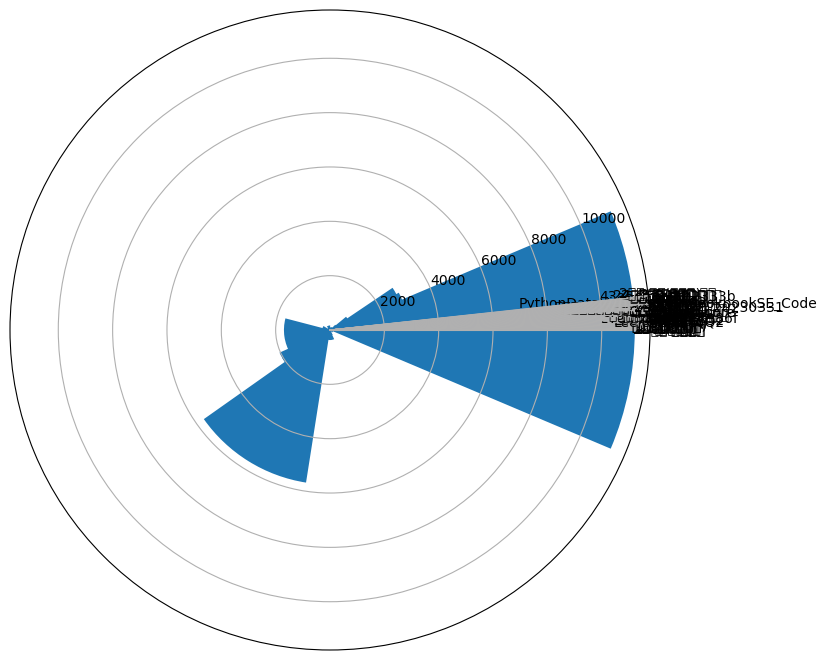

In [20]:
def build_folders(start_path):
    folders = []

    # 시작 경로가 폴더인지 확인
    if not os.path.isdir(start_path):
        print("ERROR: The specified path is not a directory.")
        return folders

    for dirpath, dirnames, filenames in os.walk(start_path):
        size = get_size(dirpath)
        if size >= 25 * 1024 * 1024:  # 크기가 25MB 이상인 폴더만 저장
            folders.append({'size': size, 'path': dirpath})

    for each in folders:
        print("Path: " + os.path.basename(each['path']))
        print("Size: " + str(each['size'] / 1024 / 1024) + " MB")

    return folders

def get_size(path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            try:
                size = os.path.getsize(fp)
                total_size += size
            except OSError as err:
                print(str(err))
                pass
    return total_size

def draw(folders):
    if not folders:
        print("ERROR: No folders found in the specified path.")
        return

    figsize = (8, 8)
    ldo, rup = 0.1, 0.8
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([ldo, ldo, rup, rup], polar=True)

    x = [os.path.basename(x['path']) for x in folders]
    y = [y['size'] / 1024 / 1024 for y in folders]
    theta = np.linspace(0, 2 * np.pi, len(x), endpoint=False)
    radii = y

    bars = ax.bar(theta, radii)
    theta_ticks = np.linspace(0, 2 * np.pi, len(x), endpoint=False)
    lines, labels = plt.thetagrids(theta_ticks, labels=x, frac=0.5)
    for step, each in enumerate(labels):
        each.set_rotation(theta[step] * (180 / np.pi) + 90)
        each.set_fontsize(8)

    colormap = lambda r: cm.Set2(r / len(x))
    for r, each in zip(radii, bars):
        each.set_facecolor(colormap(r))
        each.set_alpha(0.5)

    plt.show()

if __name__ == '__main__':
    start_path = "C:/Users/aweso/Desktop"  # 사용자 이름을 실제로 변경해야 합니다.
    folders = build_folders(start_path)
    draw(folders)
